In [2]:
import os
from elasticsearch import Elasticsearch
from piffle.iiif import IIIFImageClient 
from io import BytesIO
import httpx
from PIL import Image

In [3]:
local_es = Elasticsearch(
    hosts=os.environ['LOCAL_HOST'],
    http_auth=(
        os.environ['LOCAL_USER'],
        os.environ['LOCAL_PASS']
    )
)

In [4]:
local_es.indices.get_alias("*")

/opt/conda/lib/python3.9/site-packages/elasticsearch/connection/base.py:208: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.13/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)
/opt/conda/lib/python3.9/site-packages/elasticsearch/connection/base.py:208: ElasticsearchWarning: this request accesses system indices: [.tasks], but in a future major version, direct access to system indices will be prevented by default
  warnings.warn(message, category=ElasticsearchWarning)


{'images-indexed-2021-07-06': {'aliases': {}},
 '.tasks': {'aliases': {}},
 'test_index': {'aliases': {}}}

In [5]:
search_terms = "cat"

response = local_es.search(
    index=os.environ['INDEX_NAME'],
    body={
          "query": {
                "match_all": {
                
            }
          },
  "size": 20,
  "from": 0,
  "sort": [
    {
      "_id": {
        "order": "desc"
      }
    }
  ]
}
)




/opt/conda/lib/python3.9/site-packages/elasticsearch/connection/base.py:208: ElasticsearchWarning: Loading the fielddata on the _id field is deprecated and will be removed in future versions. If you require sorting or aggregating on this field you should also include the id in the body of your documents, and map this field as a keyword field that has [doc_values] enabled
  warnings.warn(message, category=ElasticsearchWarning)


In [6]:
print(
    f"Found {response['hits']['total']['value']} "
    f"results in {response['took'] / 1000}s"
)

Found 10000 results in 0.618s


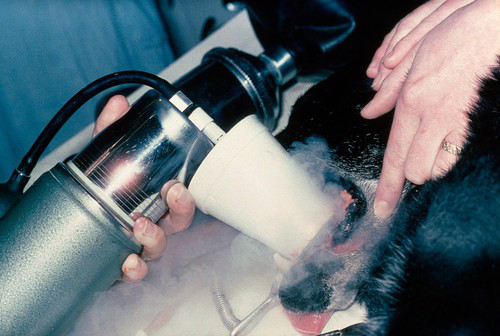

In [7]:
first_result = response['hits']['hits'][0]
iiif_url = first_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))

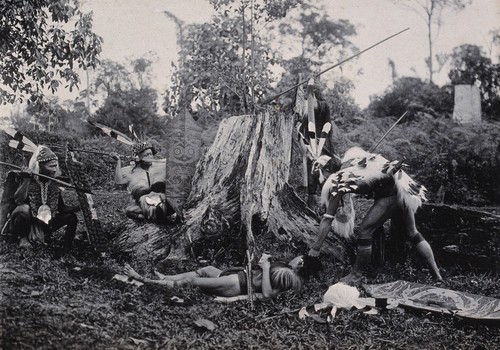

In [8]:
last_result = response['hits']['hits'][19]
iiif_url = last_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))

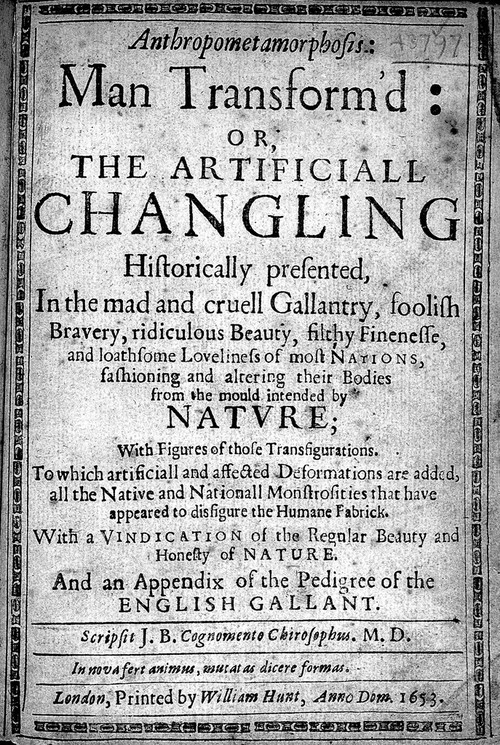

In [9]:
blast_result = response['hits']['hits'][18]
iiif_url = blast_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))

In [10]:
print(last_result['_id'])

zzwhp7e5


In [11]:
print(first_result['_id'])

zzzqhc7v


In [12]:
print(blast_result['_id'])

zzwkdz6j


In [13]:
search_terms = "cat"

response = local_es.search(
    index=os.environ['INDEX_NAME'],
    body={
          "query": {
                "match_all": {
                
            }
          },
  "size": 50,
  "from": 0,
                "search_after": ["zzwkdz6j"],
  "sort": [
    {
      "_id": {
        "order": "desc"
      }
    }
  ]

}
)


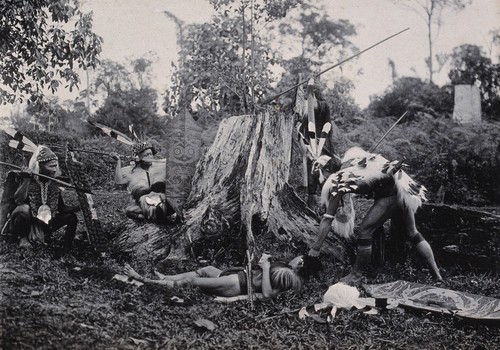

In [14]:
first_result = response['hits']['hits'][0]
iiif_url = first_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))

In [15]:
print(
    f"Found {response['hits']['total']['value']} "
    f"results in {response['took'] / 1000}s"
)

Found 10000 results in 1.589s


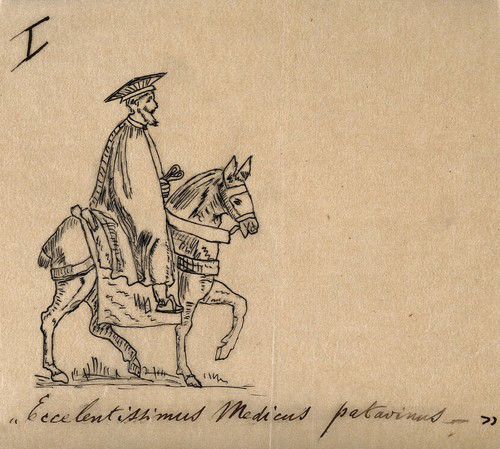

In [16]:
last_result = response['hits']['hits'][49]
iiif_url = last_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))

In [17]:
print(last_result['_id'])

zzpbtt37


In [ ]:
search_terms = "cat"

response = local_es.search(
    index=os.environ['INDEX_NAME'],
    body={
          "query": {
                "match_all": {
                
            }
          },
  "size": 50,
  "from": 0,
                "search_after": ["zzwhp7e5"],
  "sort": [
    {
      "_id": {
        "order": "asc"
      }
    }
  ]

}
)


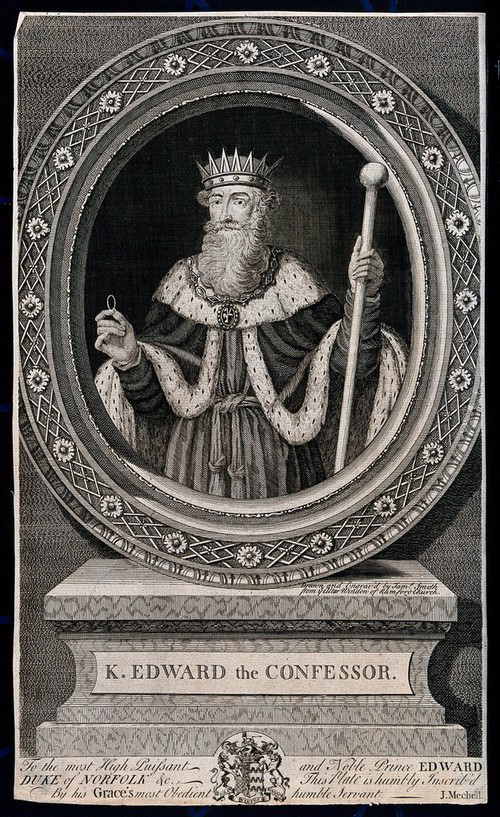

In [25]:
first_result = response['hits']['hits'][0]
iiif_url = first_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))

In [26]:
search_terms = "cat"

for i in range(300):
    response = local_es.search(
    index=os.environ['INDEX_NAME'],
    body={
          "query": {
                "match_all": {
                
            }
          },
  "size": 50,
  "from": 0,
                "search_after": [last_result['_id']],
  "sort": [
    {
      "_id": {
        "order": "desc"
      }
    }
      ]
    }
    )
    last_result = response['hits']['hits'][49]
    print(response['hits']['hits'][49]['_id'])
    print(i)




x3vqdy2d
0
x3mqb7af
1
x3dk8wp6
2
x3585u8g
3
x2wb4u5a
4
x2jgccae
5
x29z4nfw
6
x23nm43f
7
wzv957p8
8
wznmpbmv
9
wzd488qp
10
wz57vd9z
11
wyv8jb6b
12
wym7zrab
13
wyd2qwfm
14
wy47d3vz
15
wxvn7cmw
16
wxntjkqy
17
wxdh59s8
18
wx5wf4cd
19
wwxmv6gy
20
wwqvaxc2
21
wwfyt9kn
22
ww8eewdq
23
wvz7rukw
24
wvqvzk8v
25
wvfxx6y6
26
wv8gmnrs
27
wuz78vu3
28
wurjb4fq
29
wuh5ts6v
30
wu9fsx6b
31
wtyrp5fh
32
wtrxj65s
33
wtk3bj8d
34
wtbajz7f
35
wt49s8hf
36
wsuyv397
37
wsns48p4
38
wsf85myk
39
ws7kh9rv
40
wrxk2h95
41
wrnkxy3x
42
wrdfgnrb
43
wr3edh8q
44
wqtwfd2g
45
wqhxkpff
46
wq8s4em2
47
wpybt3ah
48
wpq8t79k
49
wpfwbpm3
50
wp84mqr2
51
wp246xze
52
wns7bqh5
53
wne24qpd
54
wn6vvg29
55
wmxeey36
56
wmpdhu8z
57
wmftb7vv
58
wm86adtt
59
wkycgmjn
60
wkprun9m
61
wkgd5vfw
62
wk8wuy82
63
wjzph6wv
64
wjs4u3y6
65
wjh3643v
66
wjaa62uk
67
wj4aan4v
68
whtw6yjc
69
whmnt82s
70
whah392y
71
wh3wszgt
72
wgucytm3
73
wggbyxku
74
wg8zzzm7
75
wg3cvna5
76
wfup53hq
77
wfm478tz
78
wfdtnw8w
79
wf6dcjhv
80
weumabve
81
wem6ac8f
82
websgaau
83
we

IndexError: list index out of range

In [27]:
print(response['hits']['hits'][49]['_id'])

uqw89fe7


In [ ]:
last_result = response['hits']['hits'][199]
iiif_url = last_result['_source']['state']['derivedData']['thumbnail']['url']
image_url = str(IIIFImageClient().init_from_url(iiif_url).size(width=500))
Image.open(BytesIO(httpx.get(image_url).content))


In [ ]:
print(response['hits']['hits'][50]['_id'])